#**CHAP7 군집화**

##**1.K-평균 알고리즘 이해**

* 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

(1) 먼저 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓음. 

(2) 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속됨

(3) 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동

(4) 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경함

(5) 다시 중심을 소속된 데이터의 평균 중심으로 이동함

(6) 중심점을 이동했는데 데이터의 중심점 소속이 변경되지 않으면 군집화 종료


* 장점 : 일반적인 군집화에서 가장 많이 활용되며 알고리즘이 쉽고 간결함

* 단점
  * 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 (이 경우 PCA로 차원 감소를 적용해야 할 수도 있음)
  * 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
  * 몇 개의 군집을 선택해야 할 지 가이드하기 어려움

###1) 사이킷런 KMeans 클래스 소개

* 사이킷런 패키지는 K-평균을 구현하기 위해 KMeans 클래스를 제공함

* 파라미터
  * n_clusters : 군집 개수
  * init : 초기에 군집 중심점의 좌표를 설정할 방식, 보통 k-means++ 방식으로 최초 설정
  * max_iter는 최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

* fit, fit_transform 메서드를 이용해 수행

* 속성
  * labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
  * cluster_centers_ : 각 중심점 좌표 > 좌표 시각화 가능

###2) K-평균을 이용한 붓꽃 데이터 세트 군집화

In [47]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [48]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


* 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 됐는지 확인

* 붓꽃 데이터 세트의 target값을 'target'칼럼으로, 앞에서 구한 labels_값을 'cluster' 칼럼으로 지정해 irisDF 데이터프레임에 추가한 뒤에 groupby 연산을 실제 분류 값인 target과 군집화 분류 값인 cluster 레벨로 적용해 target과 cluster 값 개수 비교

In [49]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


* target2가 제대로 군집화 되지 않음

* 시각화
  * 2차원 데이터로 차원축소 (PCA 이용)

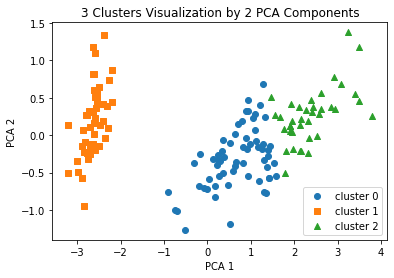

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]

# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.legend(('cluster 0', 'cluster 1', 'cluster 2'))
plt.show()

###3) 군집화 알고리즘 테스트를 위한 데이터 생성

* 데이터 생성기 make_blobs(), make_classification()

* make_blolbs()
  * 피처 데이터 세트와 타깃 데이터 세트가 튜플로 반환됨
  * n_samples : 생성할 총 데이터 갯수
  * n_features : 데이터 피처의 갯수
  * centers : 정수 > 군집의 갯수 / ndarray > 개별 군집 중심점의 좌표
  * cluster_std : 생성될 군집 데이터의 표준 편차

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8,random_state=0)
print(X.shape,y.shape)

#y target 값의 분포를 확인
unique,counts=np.unique(y,return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


> 세개의 군집이 균일하게 구성됨

* 데이터 프레임으로 변환

In [52]:
import pandas as pd
clusterDF=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


* 마커를 다르게 하여 군집화 분포 확인

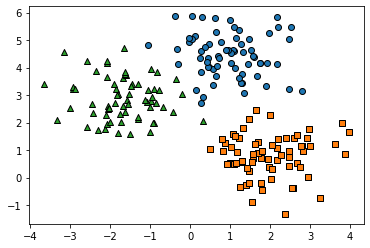

In [53]:
target_list=np.unique(y)
#각 타깃별 산점도의 마커 값
markers=['o','s','^','P','D','H','x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list 는 [0,1,2]

for target in target_list:
  target_cluster=clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])

plt.show()


* KMeans 군집화 후 군집별로 시각화

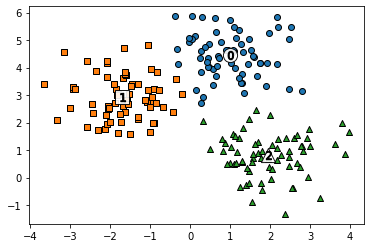

In [54]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )

    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
plt.show()

* make_blobs()의 target과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있음

In [55]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


## **2. 군집 평가 (Cluster Evaluation)**

* 대부분의 군집화 데이터 세트는 타깃 레이블을 가지고 있지 않음 (비지도학습)

* 비지도 학습의 특성 상 어떠한 지표라도 정확하게 성능을 평가하기는 어려움.

###1) 실루엣 분석의 개요

* 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는가
  * 군집 간 거리는 크고, 군집 내 거리는 작도록

* 실루엣 계수 : 개별 데이터가 가지는 군집화 지표
  * 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화 되어 있고 다른 군집에 있는 데이터는 얼마나 멀리 분리되어 있는지를 나타내는 지표

* b(i)-a(i)
  * a(i) : i번째 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리의 평균
  * b(i) : i번째 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리

* 정규화를 위해 Max(a(i),b(i)) 로 나눔

* 실루엣 계수 s(i) = ( b(i)-a(i))/ Max(a(i),b(i))
  * -1~1
  * 1에 가까워 질수록 근처의 군집과 더 멀리 떨어져 있음을 의미
  * 음수값 : 아예 다른 군집에 데이터 포인트가 할당되었음을 의미

* sklearn.metrics.sillhouette_samples(X,labels,metric='euclidean',**kwds) : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환함

* sklearn.metircs.sillhouette_score(X, labels, metric='euclidean',sample_size=None, **kwds) : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣 계수 값의 평균을 반환
  * np.mena(sillhouette_samples()) 와 같음

* 좋은 군집화의 조건
  * 전체 실루엣 계수의 평균값, 즉 사이킷런의 sillhouette_score() 값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
  * 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함
    * 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아님 (평균은 outlier에 민감함)

###2) 붓꽃 데이터 세트를 이용한 군집 평가


In [56]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_lenth','petal_width']
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
kmenas=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster']=kmenas.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples=silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff']=score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함
average_score=silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 silhouette Analysis Score : {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 silhouette Analysis Score : 0.553


,sepal_length,sepal_width,petal_lenth,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [57]:
#군집별 평균 실루엣 계수 값 알아보기
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

###3) 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

* 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼수는 없음
  * 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 잇어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있음

* http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

* 시각화 코드 일부

In [58]:
#make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0,10.0), shuffle=True, random_state=1)

In [59]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):     
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
   
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
   
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
   
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
       
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
       
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
       
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
       
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
           
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
           
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

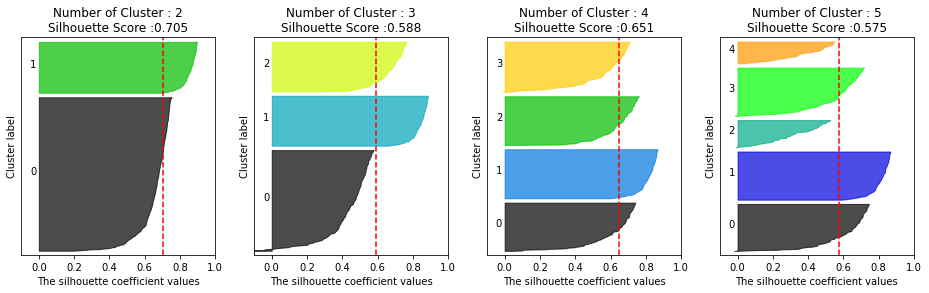

In [60]:
#군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)

* 붓꽃 데이터로 K-means 수행 시 최적의 군집 갯수 알아보기

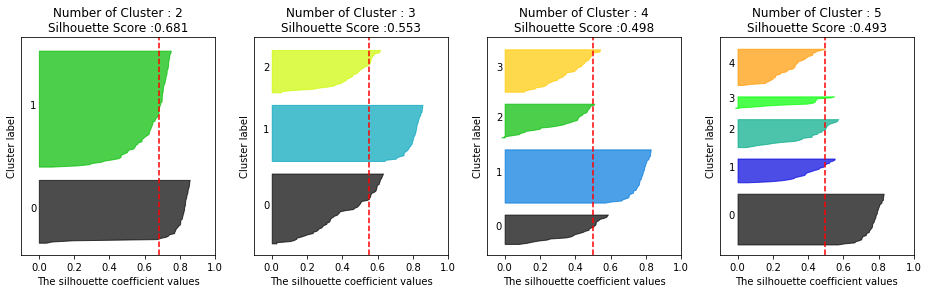

In [61]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5],iris.data)

* 실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행시간이 크게 늘어남

##**3. 평균 이동**

###1) 평균이동 (Mean Shift)의 개요

* 군집의 중심으로 지속적으로 움직이면서 군집화를 수행
* K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴

* 평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾음
  * 군집 중심점은 데이터 포인트가 모여있는 곳이라는 것에서 착안한 것이며 이를 위해 확률 밀도 함수를 이용함.
  * 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도함수를 찾기 위해서 KDE를 이용함

* 평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환값을 현재 위치에서 업데이트하면서 이동하는 방식을 취함. 이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아냄

In [62]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y=make_blobs(n_samples=200,n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))


cluster labels 유형: [0 1 2 3 4 5]


* 일반적으로 bandwidth 값을 작게 할수록 군집 개수가 많아짐


In [63]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))


cluster labels 유형: [0 1 2]


* estimate_bandwidth()의 파라미터로 피처 데이터 세트를 입력해주면 최적화된 bandwidth 값을 반환해 줌

In [64]:
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X)
print('bandwidth 값 : ', round(bandwidth,3))

bandwidth 값 :  1.816


In [65]:
import pandas as pd
clusterDF=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y

#estimate_Bandwidth()로 최적의 bandwidth계산
best_bandwidth=estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


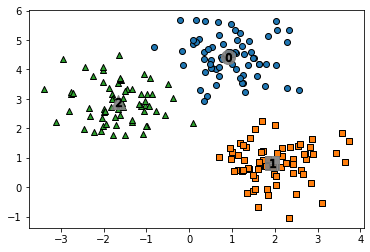

In [66]:
# 시각화

import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
   
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

* 평균이동은 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능함
* 이상치의 영향력도 크지 않으며 미리 군집의 개수를 정할 필요도 없음

* 알고리즘의 수행 시간이 오래 걸림
* bandwidth에 군집화가 매우 달라짐

* 컴퓨터 비전 분야에 많이 사용됨

##**4. GMM(Gaussian Mixture Model)**

###1) GMM(Gaussian Mixture Model) 소개

* 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(정규분포)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정 하에 군집화를 수행하는 방식

* 데이터를 여러 개의 정규분포가 섞인 것으로 간주함

* 섞인 데이터 분포에서 개별 유형의 정규분포를 추출

* 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM 군집화 방식
  * 전체 데이터 분포에서 여러 개의 정규 분포 곡선을 추출하고 개별 데이터가 이중 어떤 정규분포에 속하는지 결정하는 방식
  * 모수 추정 필요 (평균,분산 / 각 데이터가 어떤 정규분포에 해당되는지의 확률)

* 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용함
  * 사이킷런은 GMM의 EM 방식을 통한 모수 추정 군집화를 지원하기 위해 GaussianMixture 클래스를 지원함

###2) GMM을 이용한 붓꽃 데이터 세트 군집화

* 확률 기반 군집화인 GMM과 거리 기반 군집화인 K-means를 비교

In [67]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target']=iris.target


* GaussianMixture 파라미터
  * n_components : gaussian mixture 모델의 총 개수

In [68]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

#군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target

#target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [69]:
#K-means
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


* 붓꽃 데이터 세트는 K-means보다 GMM이 군집화에 더 효과적임

* K-means의 경우 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화가 수행될 수 있음

###3) GMM과 K-Means의 비교

* K-means는 원형의 범위에서 군집화를 수행함
  * 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못함

In [72]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    
    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

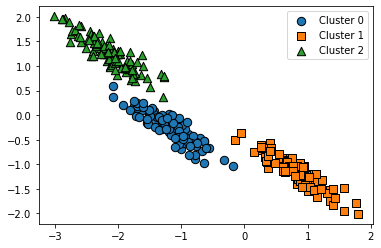

In [73]:
from sklearn.datasets import make_blobs
#make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X,y=make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

#길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함
transformation=[[0.60834549,-0.63667341],[-0.40887718,0.085253229]]
X_aniso=np.dot(X,transformation)
#feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrmae으로 저장
clusterDF=pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target']=y
#생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

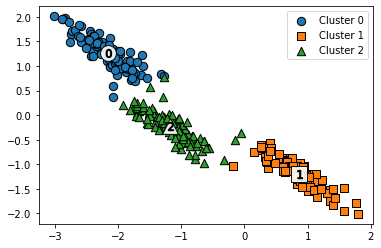

In [77]:
#3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans=KMeans(3,random_state=0)
kmeans_label=kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label
visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=True)

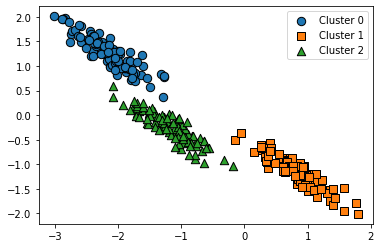

In [82]:
#3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm=GaussianMixture(n_components=3, random_state=0)
gmm_label=gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']=gmm_label

#GaussianMixture는 cluster_centers_ 속성이 없으므로 iscluster를 False로 설정
visualize_cluster_plot(gmm,clusterDF, 'gmm_label', iscenter=False)

In [84]:
print('###KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n###Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

###KMeans Clustering ###
target  kmeans_label
0       2               97
        0                2
        1                1
1       1               98
        2                2
2       0               97
        2                3
Name: kmeans_label, dtype: int64

###Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


> Kmeans의 경우 군집 1번만 정확히 매핑됐지만, 나머지 군집의 경우 target값과 어긋나는 경우가 발생함. 하지만 GMM의 경우는 군집이 target값과 잘 매핑돼 있음

* GMM의 경우 Kmeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수있다는 장점이 있지만 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있음

##**5. DBSCAN**


###1) DBSCAN 개요

* 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행 함.

* 파라미터
  * 입실론 주변 영역(epsilon) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
  * 최소 데이터 개수(min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 수

* 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의함
  * 핵심 포인트(Core point ) : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고 함
  * 이웃 포인트(Neighbor Point) : 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 함
  * 경계 포인트(Border point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라고 함
  * 잡음 포인트(Noise Point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라고 함

* 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성함. 이러한 방식으로 점차적으로 군집 영역을 확장해 나가는 것이 DBSCAN 군집화 방식임.
  * 핵심 포인트의 이웃 포인트 역시 핵심포인트일 경우 직접 접근이 가능함
  * 경계 포인트는 군집의 외곽을 형성함

* DBSCAN은 입실론 주변 영역의 최소 데이터 개ㅐ수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식

* 사이킷런은 DBSCAN 클래스를 통해 DBSCAN 알고리즘을 지원함
  * eps : 입실론 주변 영역의 반경
  * min_samples : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함되어야 할 데이터의 최소 개수 (자신의 데이터 포인트를 포함)

###2) DBSCAN 적용하기 - 붓꽃 데이터 세트


In [85]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target']=iris.target

* DBSCAN 클래스를 이용해 붓꽃 데이터 세트를 군집화

In [86]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.6,min_samples=8, metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


* 군집 레이블이 -1인 것은 노이즈에 속하는 군집

* 붓꽃 데이터 세트는 DBSCAN에서 0과 1 두개의 군집으로 군집화 됨

* DBSCAN은 군집의 개수를 알고리즘에 따라 자동으로 지정하므로 DBSCAN에서 군집의 개수를 지정하는 것은 무의미함.


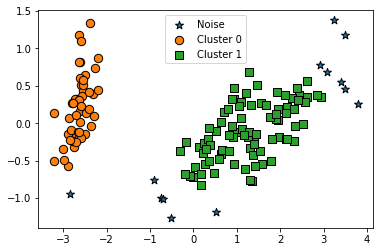

In [88]:
# 군집화 데이터 세트를 2차원 평면에서 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환한 뒤 시각화
from sklearn.decomposition import PCA

#2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca=PCA(n_components=2, random_state=0)
pca_transformed=pca.fit_transform(iris.data)
#visualize_cluster_2d() 함수는 ftr1,ftr2칼럼을 좌표에 표현하므로 PCA 변환 값을 해당 칼럼으로 생성
irisDF['ftr1']=pca_transformed[:,0]
irisDF['ftr2']=pca_transformed[:,1]

visualize_cluster_plot(dbscan,irisDF,'dbscan_cluster',iscenter=False)

> 별 모양은 모두 노이즈

* DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋음.

* DBSCAN 알고리즘에 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 것이 중요함
  * eps가 커지면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아짐
  * min_samples가 커지면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터가 많아짐

In [90]:
# eps가 커지면 노이즈 데이터 수가 줄어듦

from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


> 노이즈 갯수가 줄어듦

In [91]:
#min_samples 늘리기
dbscan=DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


> 노이즈 데이터가 증가함

###3) DBSCAN 적용하기 - make_circles() 데이터 세트

* 복잡한 기하학적 분포를 가지는 데이터 세트에서 DBSCAN과 타 알고리즘을 비교

*make_circles() : 내부 원과 외부 원 형태로 되어 있는 2차원 데이터 세트 만들기

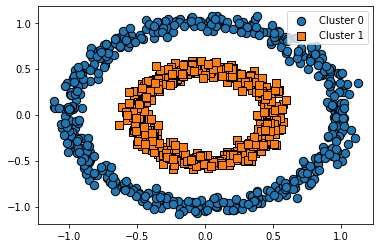

In [93]:
from sklearn.datasets import make_circles

X,y=make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0,factor=0.5)
clusterDF=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None, clusterDF,'target', iscenter=False)

* K-means와 GMM은 어떻게 이 데이터 세트를 군집화 하는지 확인

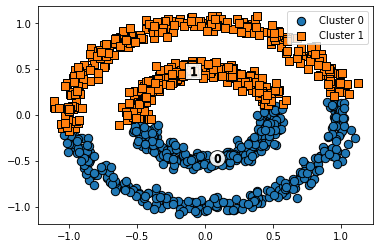

In [95]:
# KMeans로 make_circles()데이터 세트를 군집화
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels=kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels

visualize_cluster_plot(kmeans,clusterDF, 'kmeans_cluster', iscenter=True)

> 거리 기반 군집화로는 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어려움

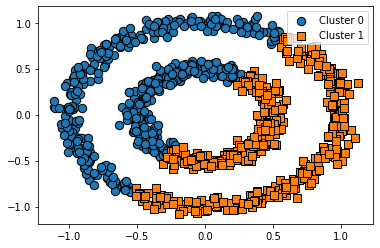

In [98]:
#GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=2, random_state=0)
gmm_label=gmm.fit(X).predict(X)
clusterDF['gmm_cluster']=gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

> 군집화가 적절하지 않음

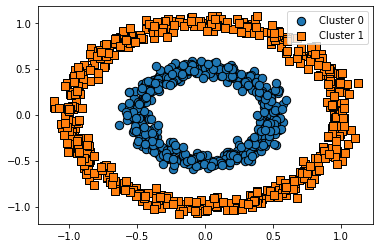

In [99]:
#DBSCAN으로 make_circles() 데이터 세트 군집화 수행
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels=dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_labels
visualize_cluster_plot(dbscan,clusterDF, 'dbscan_cluster', iscenter=False)

> 원하는 방법으로 정확히 군집화 됨